Plots used:
* Zoning 
* Neighborhood
* Overall Quality
* Decade
* House Style
* Cond Pos

Regression variables:
* All plotting vars plus
* Gr Liv Area

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error


In [110]:
df = pd.read_csv('datasets/train_cleaned.csv', na_filter=False)

### Select Features

In [111]:
df['Year Built Clipped'] = df['Year Built'].clip(lower = 1950, upper = 2009)
df['Decade'] = df['Year Built Clipped']//10*10

In [112]:
df['Garage Type'] = df['Garage Type'].replace(
    {'NA': 'No Garage', 'Basment': 'Other', '2Types': 'Other', 'CarPort': 'Other'})
df['House Style'] = df['House Style'].replace( 
    {'SFoyer': 'Other', '2.5Unf': 'Other', '1.5Unf': 'Other', '2.5Fin': 'Other'})

In [113]:
X = df[['MS Zoning', 'Neighborhood', 'Overall Qual', 'Decade', 'House Style', 
        'Garage Type', 'Cond RR', 'Cond Pos', 'Gr Liv Area']]
y = df['SalePrice']

In [114]:
X.head()

,MS Zoning,Neighborhood,Overall Qual,Decade,House Style,Garage Type,Cond RR,Cond Pos,Gr Liv Area
0,RL,Sawyer,6,1970,2Story,Attchd,1,0,1479
1,RL,SawyerW,7,1990,2Story,Attchd,0,0,2122
2,RL,NAmes,5,1950,1Story,Detchd,0,0,1057
3,RL,Timber,5,2000,2Story,BuiltIn,0,0,1444
4,RL,SawyerW,6,1950,1.5Fin,Detchd,0,0,1445


### Train Linear Model

#### Transform Data

In [115]:
num_cols = ['Overall Qual', 'Decade', 'Cond RR', 'Cond Pos', 'Gr Liv Area']
cat_cols = ['MS Zoning', 'Neighborhood', 'House Style', 'Garage Type']

In [116]:
X_num = X[num_cols]
X_cat = X[cat_cols]

In [197]:
ohe = OneHotEncoder(drop=['RL', 'other', 'Other', 'Other'], sparse= False)

In [118]:
X_cat_ohe = ohe.fit_transform(X_cat)

In [119]:
ohe.get_feature_names_out()

array(['MS Zoning_FV', 'MS Zoning_RM', 'MS Zoning_other',
       'Neighborhood_Blmngtn', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker',
       'House Style_1.5Fin', 'House Style_1Story', 'House Style_2Story',
       'House Style_SLvl', 'Garage Type_Attchd', 'Garage Type_BuiltIn',
       'Garage Type_Detchd', 'Garage Type_No Garage'], dtype=object)

In [120]:
X_cat_ohe = pd.DataFrame(X_cat_ohe, columns = ohe.get_feature_names_out())

In [121]:
X_cat_ohe.head()

,MS Zoning_FV,MS Zoning_RM,MS Zoning_other,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1Story,House Style_2Story,House Style_SLvl,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_No Garage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [122]:
X_full = pd.merge(left = X_cat_ohe, right = X_num, left_index= True, right_index=True)

In [123]:
X_full.head()

,MS Zoning_FV,MS Zoning_RM,MS Zoning_other,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,House Style_SLvl,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_No Garage,Overall Qual,Decade,Cond RR,Cond Pos,Gr Liv Area
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6,1970,1,0,1479
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,7,1990,0,0,2122
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,5,1950,0,0,1057
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,5,2000,0,0,1444
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,6,1950,0,0,1445


#### Fit model

In [124]:
lr = LinearRegression()

In [125]:
lr.fit(X_full, y)

LinearRegression()

In [126]:
coefs = pd.DataFrame(lr.coef_, columns = ['Coef_'], index = X_full.columns)

In [160]:
coefs

,Coef_
MS Zoning_FV,-5895.461060
MS Zoning_RM,-13840.600392
MS Zoning_other,-10850.435786
Neighborhood_Blmngtn,-22219.162784
Neighborhood_BrDale,-13335.721207
Neighborhood_BrkSide,4082.490829
Neighborhood_ClearCr,21888.635589
Neighborhood_CollgCr,-3825.572846
Neighborhood_Crawfor,17826.377679
Neighborhood_Edwards,-14268.744843


### Visualize coefficients

In [151]:
sns.set_style('ticks')
sns.set_context('talk')
plt.rc('axes', titlecolor = 'dimgrey', labelcolor = 'dimgrey', labelsize = 15)
plt.rc('figure', figsize = (7, 5))

In [186]:
def coef_bar(row_start, row_end, order = None):
    data = coefs.loc[row_start: row_end]
    data.index = [c.split('_')[1] for c in data.index]
    # print(data.index)
    if order is not None:
        data.reindex(columns = order)
    data.plot(kind = 'bar', grid = True)
    plt.ylabel('MODEL COEFFFICIENT')
    # plt.xticks(rotation = 0)

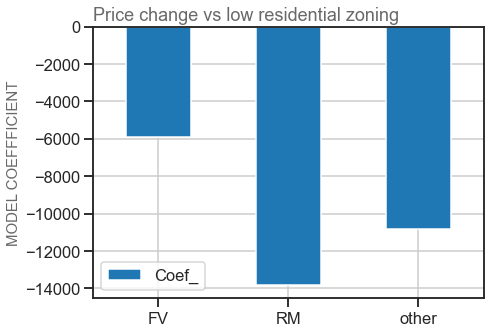

In [188]:
# coefs.loc['MS Zoning_FV':'MS Zoning_other'].plot(kind = 'bar')
coef_bar('MS Zoning_FV', 'MS Zoning_other', order = ['RM', 'FV', 'other'])
plt.xticks(rotation = 0)
plt.title('Price change vs low residential zoning', loc = 'left')
plt.show()

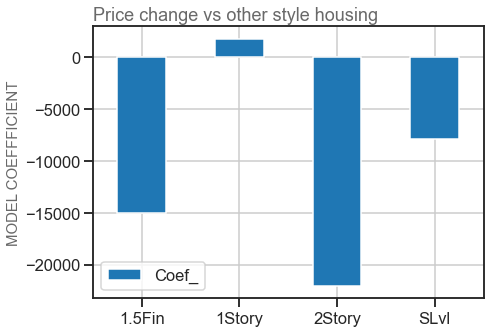

In [195]:
coef_bar('House Style_1.5Fin', 'House Style_SLvl',
    order = ['1Story', '2Story', '1.5Fin', 'SLvl'])
plt.title('Price change vs other style housing', loc = 'left')
plt.xticks(rotation = 0)
plt.show()

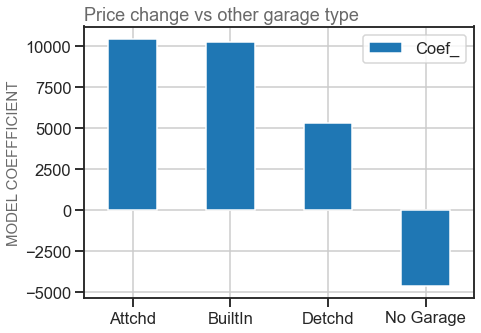

In [196]:
coef_bar('Garage Type_Attchd', 'Garage Type_No Garage',
    order = ['Attchd', 'Detchd', 'Builtin', 'No Garage'])
plt.title('Price change vs other garage type', loc = 'left')
plt.xticks(rotation = 0)
plt.show()

Text(0.5, 1.0, '')

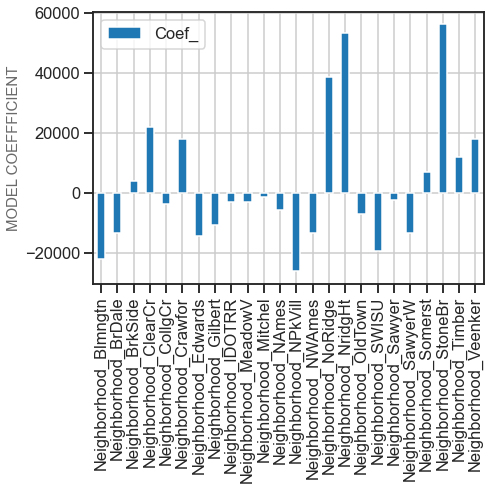

In [172]:
coef_bar('Neighborhood_Blmngtn', 'Neighborhood_Veenker')
plt.title('')

#### Statsmodels

In [127]:
# X_full['int'] = np.ones_like(y)

In [128]:
# import statsmodels.api as sm

In [129]:
# model = sm.OLS(y, X_full).fit()
# model.summary()

In [130]:
# coefs = pd.DataFrame(model.summary().tables[1])
# coefs.set_index(0, inplace= True)
# coefs.columns = coefs.iloc[0]
# coefs = coefs.iloc[1:]
# coefs.head()

In [131]:
# coefs.iloc[0:3, :]

### Test predictions on unseen data

In [132]:
X_test = pd.read_csv('datasets/test_cleaned.csv', index_col = 'Id', na_filter=False)

In [133]:
X_test['Year Built Clipped'] = X_test['Year Built'].clip(lower = 1950, upper = 2009)
X_test['Decade'] = X_test['Year Built Clipped']//10*10

In [134]:
X_test['Garage Type'] = X_test['Garage Type'].replace({'NA': 'No Garage', 'Basment': 'Other', '2Types': 'Other', 'CarPort': 'Other'})
X_test['House Style'] = X_test['House Style'].replace( 
    {'SFoyer': 'Other', '2.5Unf': 'Other', '1.5Unf': 'Other', '2.5Fin': 'Other'})

In [135]:
X_test_num = X_test[num_cols]
X_test_cat_ohe = ohe.transform(X_test[cat_cols])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, 
    columns = ohe.get_feature_names_out(),
    index = X_test.index)

In [136]:
X_test_full = pd.merge(left = X_test_cat_ohe, right = X_test_num, left_index= True, right_index=True)

In [137]:
X_test_full

,MS Zoning_FV,MS Zoning_RM,MS Zoning_other,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,House Style_SLvl,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_No Garage,Overall Qual,Decade,Cond RR,Cond Pos,Gr Liv Area
Id,,,,,,,,,,,,,,,,,,,,,
2658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,6,1950,0,0,1928
2718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,5,1970,0,0,1967
2414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,7,2000,0,0,1496
1989,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,5,1950,0,0,968
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6,1960,0,0,1394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6,1970,0,1,1877
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6,1960,0,0,1988
1373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,5,1960,0,0,1211


In [138]:
preds = lr.predict(X_test_full)

In [139]:
preds.shape

(878,)

In [140]:
pd.Series(preds, index = X_test.index, name = 'SalePrice').to_csv('submission/pres_model.csv', index=True)

Kaggle score: RMSE of $31,500.